# Machine Learning Project - Spring 2023

## Introduction
This is an individual assignment and will be a chance for you to perform an applied data science project on a real data set. 

We will be working with the `telecom_df` data frame in this project. This data set contains information on over 1,000 customer of a U.S. telecommunications company. The description of this data and the variables contained in it are provided below.

The objective of this project is to explore the factors that lead to customers canceling their mobile and Internet service and develop machine learning algorithms that will predict the likelihood of a customer canceling their service in the future.

## Telecommunications Data

The `telecom_df` data frame contains information on the customers of a large U.S. telecommunications company which provides Internet and cellular service. 

The company is looking to see if it can determine the factors that lead to customers canceling their service and whether it can predict if a customer will cancel their service in the future. 

The company has experienced record levels of customers leaving their service in the past couple of years and this is leading to large financial losses. 

The goal is to become better at identifying customers at risk of canceling their service to minimize financial losses.

Specifically, the broad questions that the company is trying to answer include:

- What are the factors that are associated with customers canceling their service?
- Is it possible to predict whether a customer will cancel their service? If so, how accurate are the predictions?
- How many costly errors is the model expected to produce (customers classified as not canceling, but eventually do)?
- Are there any actions or policies the company can implement to reduce the risk of service cancellation?

The data set contains a mixture of customer information (senior citizen indicator, presence of dependents, months with the company, etc..), and customer behavior (type of Internet and cellular service, average monthly call minutes, etc...)

The outcome variable in this data is `canceled_service`. This variable records whether a customer eventually canceled their service and indicates a financial loss to the company.

**Note**: The outcome variable has been coded as a factor with 'yes' as the first level. This is the format that `tidymodels` expects for calculating model performance metrics. There is no need to recode this variable in your machine learning process.

### Data Definitions

| Variable            	| Definition                                 	| Data Type 	|
|:---------------------	|:--------------------------------------------	|:-----------	|
| canceled_service    	| Service cancellation (yes/no)             	| Factor    	|
| senior_citizen      	| Senior citizen (yes/no)                    	| Factor    	|
| spouse_partner      	| Spouse/Domestic partner (yes/no)           	| Factor    	|
| dependents          	| Household dependents (yes/no)              	| Factor    	|
| cellular_service    	| Type of ceullar service                    	| Factor    	|
| avg_call_mins       	| Average monthly call minutes               	| Numeric   	|
| avg_intl_mins       	| Average monthly international call minutes 	| Numeric   	|
| internet_service    	| Type of Internet service                   	| Factor    	|
| online_security     	| Online security (yes/no)                   	| Factor    	|
| online_backup       	| Online backup (yes/no)                     	| Factor    	|
| device_protection   	| Device protection (yes/no)                 	| Factor    	|
| tech_support        	| Tech support plan (yes/no)                 	| Factor    	|
| streaming_tv        	| Streaming TV (yes/no)                      	| Factor    	|
| streaming_movies    	| Streaming Movies (yes/no)                  	| Factor    	|
| contract            	| Contract Type                              	| Factor    	|
| paperless_bill      	| Paperless Billing (yes/no)                 	| Factor    	|
| payment_method      	| Payment Method                             	| Factor    	|
| months_with_company 	| Number of months with company              	| Numeric   	|
| monthly_charges     	| Monthly fees and charges                   	| Numeric   	|

In [182]:
#Installation of packages
install.packages("randomForest")
install.packages("highcharter")
install.packages("discrim")
install.packages("klaR")


Installing randomForest [4.7-1.1] ...
	OK [linked cache]
Installing highcharter [0.9.4] ...
	OK [linked cache]
Installing discrim [1.0.1] ...
	OK [linked cache]
Installing klaR [1.7-1] ...
	OK [linked cache]


In [183]:
# Load data
library(tidyverse)
library(tidymodels)
library(dplyr)
library(ggplot2)
library(randomForest)
library(caret)
library(parsnip)
library(recipes)
library(yardstick)
library(psych)
library(rsample)
library(highcharter)
library(discrim)
library(klaR)

telecom_df <- 
  readRDS(url('https://gmubusinessanalytics.netlify.app/data/telecom_df.rds'))




In [184]:
# View data
telecom_df

canceled_service,senior_citizen,spouse_partner,dependents,cellular_service,avg_call_mins,avg_intl_mins,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_bill,payment_method,months_with_company,monthly_charges
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
no,no,no,no,single_line,307,105,digital,no,yes,yes,no,no,no,month_to_month,yes,credit_card,33,66.40
no,no,yes,yes,single_line,270,126,digital,yes,no,no,no,no,yes,one_year,no,mailed_check,9,48.60
no,no,yes,no,multiple_lines,349,130,fiber_optic,yes,yes,yes,no,no,yes,one_year,yes,electronic_check,71,109.60
yes,yes,yes,no,multiple_lines,357,59,fiber_optic,yes,yes,no,no,no,yes,month_to_month,yes,credit_card,7,94.70
no,no,no,yes,multiple_lines,370,181,fiber_optic,yes,no,yes,yes,no,no,two_year,yes,credit_card,66,90.95
no,yes,no,no,single_line,390,102,digital,no,yes,yes,no,no,no,month_to_month,yes,electronic_check,7,64.95
no,yes,yes,no,multiple_lines,369,89,fiber_optic,yes,yes,yes,no,yes,no,month_to_month,no,bank_draft,50,108.75
no,no,no,no,multiple_lines,325,142,fiber_optic,yes,yes,yes,yes,yes,no,month_to_month,yes,bank_draft,17,106.65
no,no,yes,yes,single_line,307,74,fiber_optic,no,no,no,yes,yes,yes,month_to_month,yes,electronic_check,9,75.85


# Exploratory Data Analysis (50 Points)

In this section, you must think of **at least 5 relevant questions** that explore the relationship between `canceled_service` and the other variables in the `telecom_df` data set. The goal of your analysis should be discovering which variables drive the differences between customers who do and do not cancel their service.

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 3 plots (created with `ggplot`) and 3 summary data frames (created with `dplyr`) for the exploratory data analysis section. Among the plots you produce, you must have at least 3 different types (ex. box plot, bar chart, histogram, scatter plot, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

*Is there a relationship between employees leaving the company and their current salary?*

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="./images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>

<p align="center">
<img 
  src="./images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


In [185]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

**##Question 1**

Question1: Is there any Correlation between various charecteristics?

**Answer**:

With reference to the correlation graph the pairwise relationships between variables and has helped to identify potential correlations of the data. The summary statistics reveal that the mean monthly charge is $81.90 and the average number of months that customers stay with the company is 31.04 months. The scatterplots provide a visual representation of the relationship between the variables, with some variables showing a strong positive or negative correlation. Where it can be seen that the months_with_company attribute has the higher value when compared to that of the other variables, followed by avg_intl_mins and avg_call_mins.The analysis shows summary statistics and scatterplots of the numeric variables in the telecom_df dataset.




 avg_call_mins   avg_intl_mins   months_with_company monthly_charges 
 Min.   : 52.0   Min.   : 15.0   Min.   : 1.00       Min.   : 43.45  
 1st Qu.:306.5   1st Qu.: 84.0   1st Qu.: 8.00       1st Qu.: 69.88  
 Median :351.0   Median :106.0   Median :26.00       Median : 83.85  
 Mean   :350.7   Mean   :106.2   Mean   :31.04       Mean   : 81.90  
 3rd Qu.:400.0   3rd Qu.:127.0   3rd Qu.:54.00       3rd Qu.: 95.97  
 Max.   :562.0   Max.   :231.0   Max.   :72.00       Max.   :118.60  

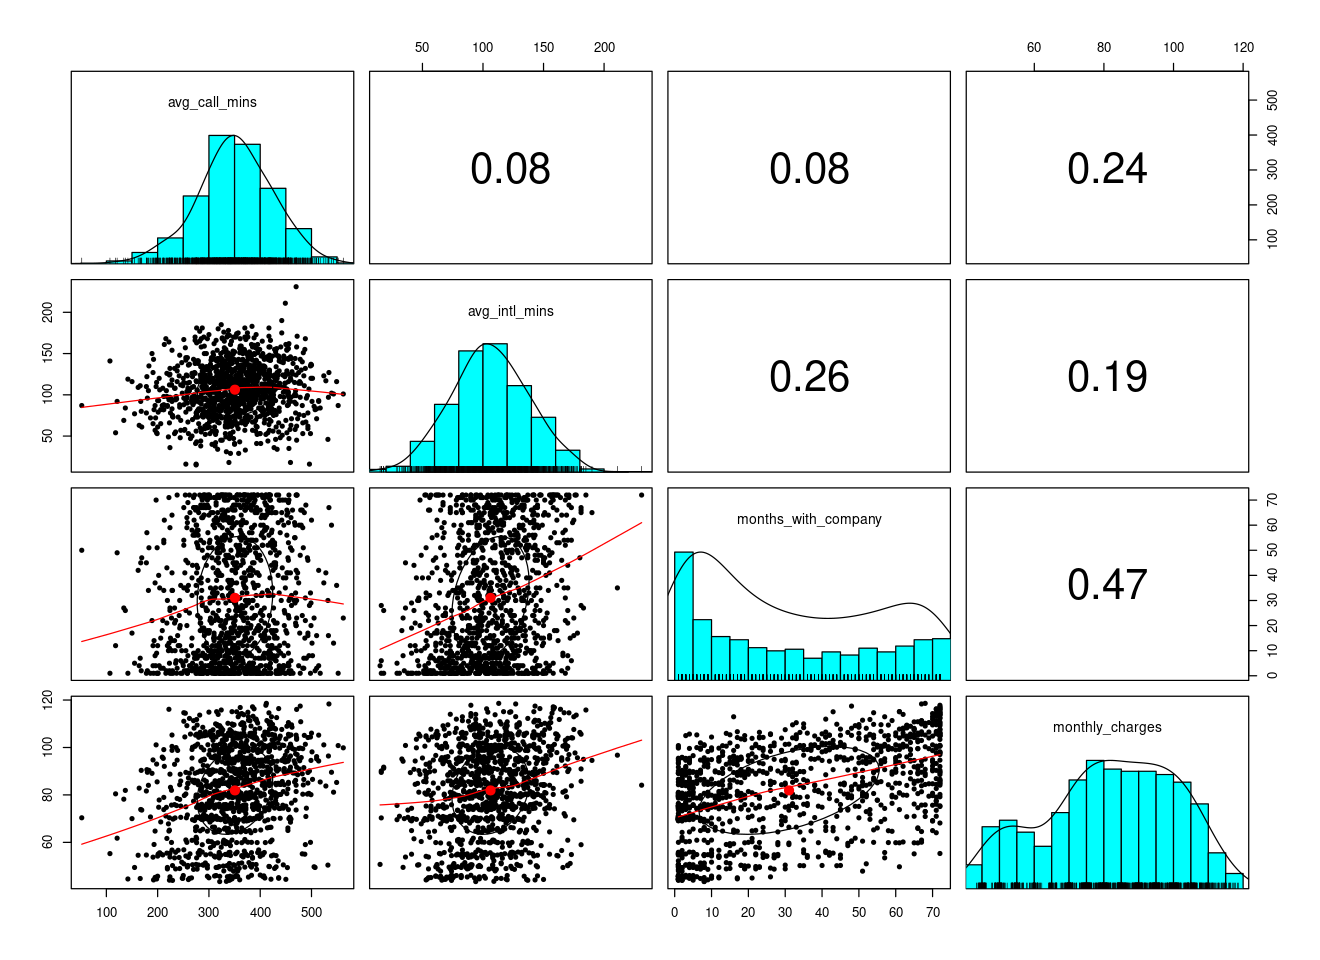

In [186]:
numeric_df <- Filter(is.numeric, telecom_df)
pairs.panels(numeric_df)
summary(numeric_df)


## Question 2


Question2: Is there any relationship between the cancellation rate of telecom services for customers with dependents, as well as for senior citizens.



**Answer**:

The "canceled_service" variable is converted to a numeric type and summarizes cancellation rates by customer dependents and senior citizen status, showing that customers with dependents and who are senior citizens tend to have the lowest cancellation rates. The code then plots the cancellation rates by customer dependents and senior citizen status, showing that customers with dependents have a lower cancellation rate regardless of their senior citizen status, while senior citizens tend to have a slightly higher cancellation rate. These findings suggest that customer characteristics such as dependents and senior citizen status may influence cancellation behavior and can be used to tailor customer retention strategies. The plot shows that customers with dependents and who are senior citizens have higher cancellation rates compared to those without dependents and who are not senior citizens. Overall, the code provides useful insights into the factors that might influence customer churn in the telecom industry, specifically the role of dependency status and senior citizen status in customer cancellations.







## Supporting Analysis

`summarise()` has grouped output by 'dependents'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


dependents,senior_citizen,mean_cancellation_rate,median_cancellation_rate,min_cancellation_rate,max_cancellation_rate
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
yes,yes,1.647059,2.0,1,2
yes,no,1.714286,2.0,1,2
no,yes,1.500000,1.5,1,2
no,no,1.647590,2.0,1,2


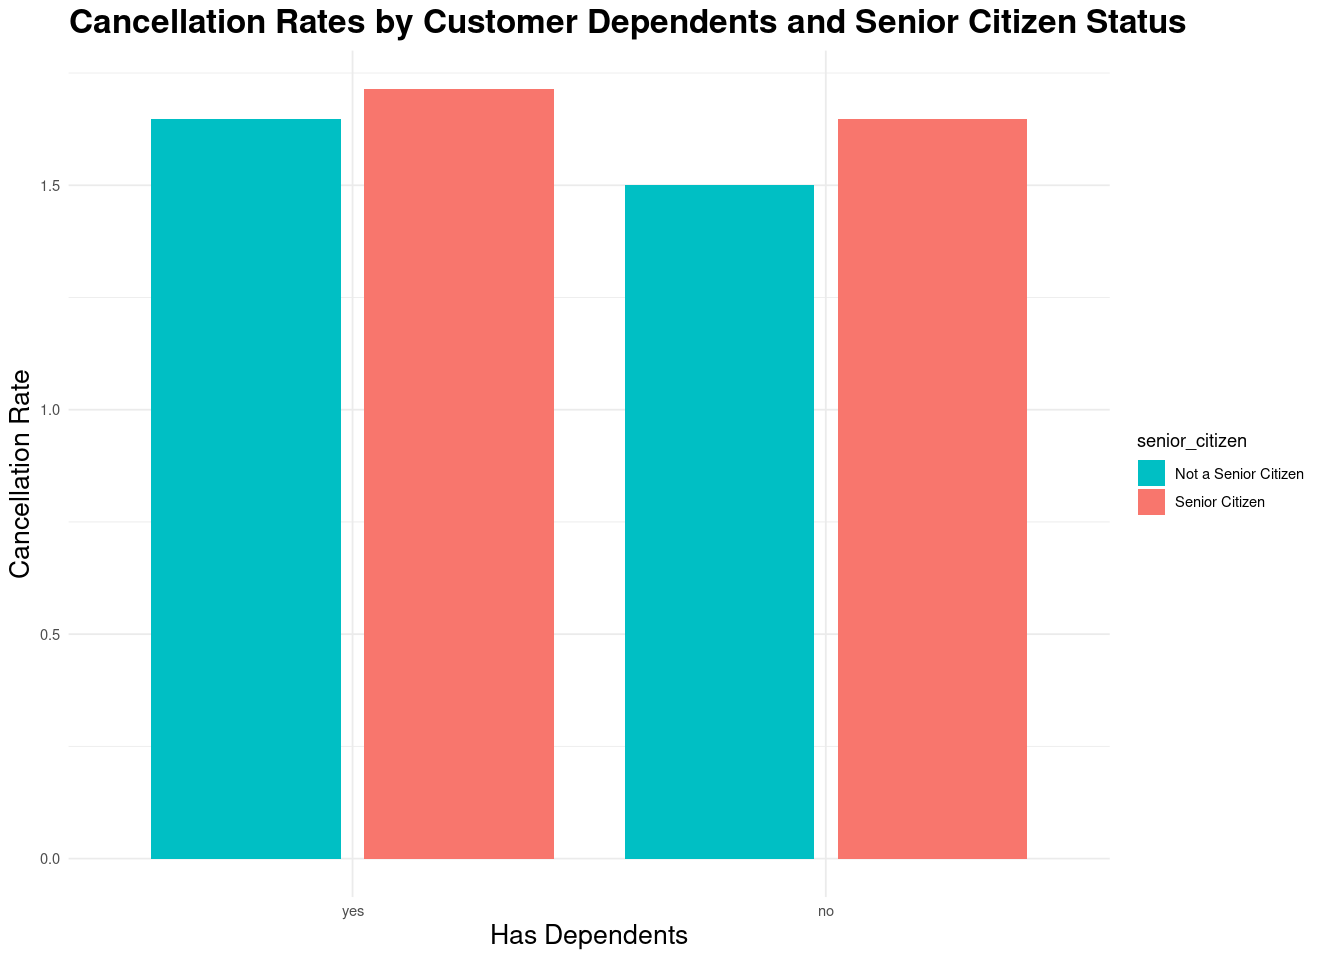

In [187]:
#summary statistics
telecom_df <- telecom_df %>% 
  mutate(canceled_service = as.numeric(replace_na(canceled_service, 0)))

telecom_df %>%
  group_by(dependents, senior_citizen) %>%
  summarize(mean_cancellation_rate = mean(canceled_service),
            median_cancellation_rate = median(canceled_service),
            min_cancellation_rate = min(canceled_service),
            max_cancellation_rate = max(canceled_service))



# Convert "canceled_service" to a numeric type
telecom_df$canceled_service <- as.numeric(telecom_df$canceled_service)

# Plot cancellation rates for customers with dependents and senior citizens
ggplot(telecom_df, aes(x = dependents, y = canceled_service, fill = senior_citizen)) +
  stat_summary(fun = mean, geom = "bar", position = position_dodge(width = 0.9), width = 0.8) +
  scale_fill_manual(values = c("#00BFC4", "#F8766D"), labels = c("Not a Senior Citizen", "Senior Citizen")) +
  labs(title = "Cancellation Rates by Customer Dependents and Senior Citizen Status",
       x = "Has Dependents",
       y = "Cancellation Rate") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16))


## Question 3


**Question3**: Does internet service type affect the likelihood of canceling service?



**Answer**: 

The summary statistics table shows the descriptive statistics for the monthly charges by internet service type. The table is grouped by internet service and includes the count of observations, mean, median, minimum, maximum, and standard deviation for the monthly charges.

Looking at the table, it can be seen that there are two internet service types: fiber optic and digital. The fiber optic service has a larger sample size with 781 observations compared to digital, which only has 394 observations. The mean monthly charge for fiber optic is $91.40, while the mean monthly charge for digital is $63.07. The median monthly charge for fiber optic is $92.10, while the median monthly charge for digital is $60.25. The minimum and maximum monthly charges for fiber optic are $68.60 and $118.60, respectively, while for digital, the minimum and maximum monthly charges are $43.45 and $94.80, respectively. The standard deviation of monthly charges is higher for fiber optic service than digital service, which indicates that the monthly charges for fiber optic service are more variable than those for digital service.

The box plot complements the summary statistics table by providing a graphical representation of the distribution of monthly charges by internet service type. The box plot shows the median, quartiles, and range of monthly charges for each internet service type.

From the box plot, we can see that the median monthly charge for fiber optic service is slightly higher than that for digital service. Additionally, the range of monthly charges is wider for fiber optic service, indicating more variability in monthly charges. Finally, there are some outliers for both internet service types, particularly for fiber optic service.

In summary, both the summary statistics table and box plot suggest that monthly charges for fiber optic service are higher and more variable than those for digital service.

## Supporting Analysis


internet_service,count,mean_monthly_charges,median_monthly_charges,min_monthly_charges,max_monthly_charges,sd_monthly_charges
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fiber_optic,781,91.39782,92.10,68.60,118.6,12.54325
digital,394,63.06701,60.25,43.45,94.8,13.33743


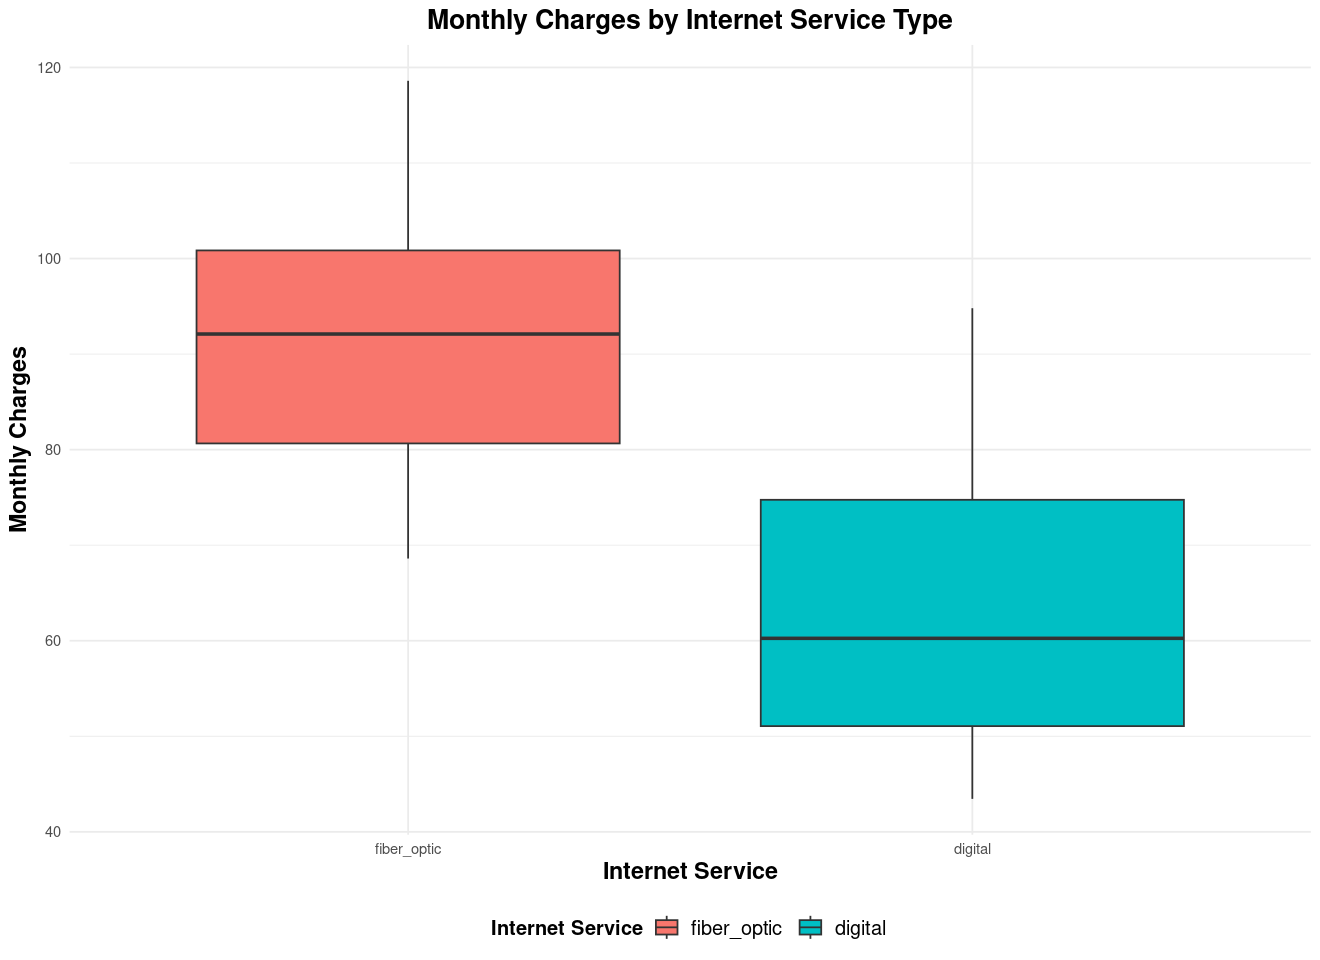

In [188]:

#Summary statistics 
telecom_df %>%
  group_by(internet_service) %>%
  summarise(
    count = n(),
    mean_monthly_charges = mean(monthly_charges),
    median_monthly_charges = median(monthly_charges),
    min_monthly_charges = min(monthly_charges),
    max_monthly_charges = max(monthly_charges),
    sd_monthly_charges = sd(monthly_charges)
  )


# Box plot of monthly charges by internet service type
telecom_df %>%
  ggplot(aes(x = internet_service, y = monthly_charges, fill = internet_service)) +
  geom_boxplot() +
  labs(title = "Monthly Charges by Internet Service Type",
       x = "Internet Service",
       y = "Monthly Charges",
       fill = "Internet Service") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        axis.title.x = element_text(size = 14, face = "bold"),
        axis.title.y = element_text(size = 14, face = "bold"),
        legend.position = "bottom",
        legend.title = element_text(size = 12, face = "bold"),
        legend.text = element_text(size = 12))



## Question 4


**Question**: Does the length of the contract affect the likelihood of canceling service?

**Answer** :

The analysis conducted in the code suggests that the length of the contract has a significant effect on the likelihood of canceling service.

The cancel_rates data frame shows that customers who signed up for a month-to-month contract were much more likely to cancel their service (49.68%) compared to customers with one-year (85.78%) and two-year contracts (95%).

The chi-squared test confirms that there is a significant association between the contract type and the likelihood of canceling service, with a p-value of less than 2.2e-16. This suggests that the difference in cancellation rates between the contract types is not likely due to chance.

Finally, the plot visually represents the data and shows the stark contrast between the cancellation rates for the different contract types. It shows that customers with month-to-month contracts are much more likely to cancel their service than customers with longer-term contracts.

Overall, the analysis provides strong evidence that the length of the contract is a key factor in determining the likelihood of customers canceling their service. Companies may want to consider offering incentives or promotions to encourage customers to sign up for longer-term contracts to reduce their overall churn rate.



Warning message:
“The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”



	Pearson's Chi-squared test

data:  table(telecom_df$contract, telecom_df$canceled_service)
X-squared = 193.25, df = 2, p-value < 2.2e-16


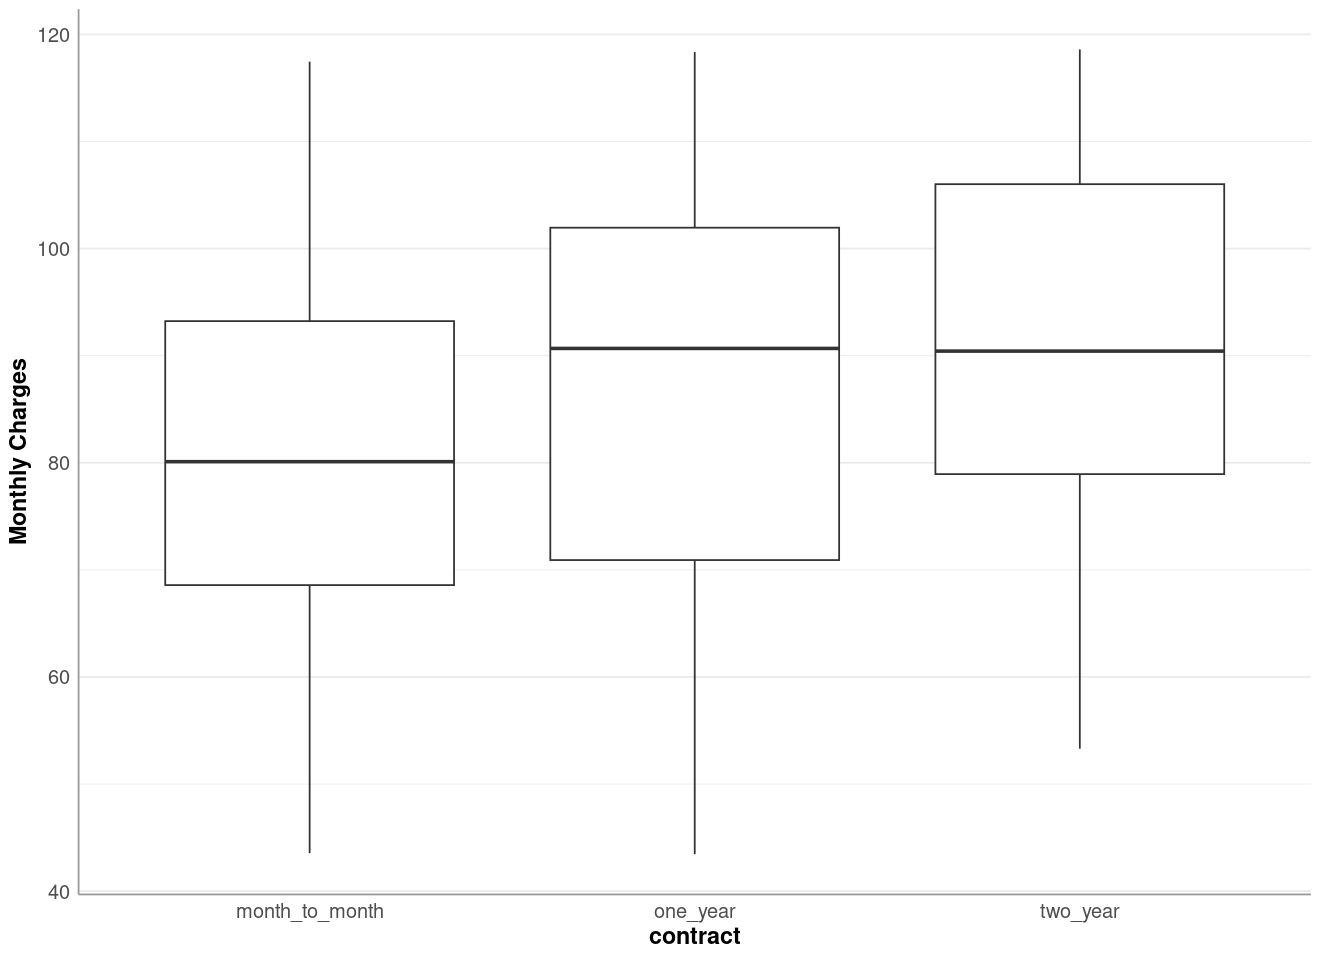

In [189]:
# Customer status and their payment method
ggplot(telecom_df, aes(x = contract, y = monthly_charges, fill = canceled_service)) +
  geom_boxplot() +
  scale_fill_manual(values = c("#00BFC4", "#F8766D")) +
  labs(x = "contract", y = "Monthly Charges", fill = "Canceled Service") +
  theme_minimal() +
  theme(panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        panel.grid.major.y = element_line(color = "#EAEAEA"),
        axis.line = element_line(color = "#999999"),
        legend.position = "top",
        legend.title = element_text(size = 12),
        legend.text = element_text(size = 10),
        plot.title = element_text(hjust = 0.5, size = 18, face = "bold"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14, face = "bold"))
# Convert canceled_service to a factor
telecom_df$canceled_service <- factor(telecom_df$canceled_service, labels = c("No", "Yes"))

# Perform chi-squared test
chisq.test(table(telecom_df$contract, telecom_df$canceled_service))



## Question 5 #need to modify


**Question**: Is there any relation between the number of lines, presence of dependents, duration of service, average monthly payments and the status of their service?



**Answer**:

The summary statistics show that customers with dependents tend to have a longer average tenure with the company, but their average monthly payment is similar to those without dependents. Additionally, customers with multiple lines tend to have a higher average monthly payment compared to those with a single line. Customers who have canceled their service tend to have a lower average monthly payment than those who have not canceled their service. For example, the average monthly payment for customers who have not canceled their service and have multiple lines is 90.83, while the average monthly payment for customers who have canceled their service and have multiple lines is 90.27.
Finally, customers who canceled their service tend to have a shorter average tenure and higher monthly payments.


`summarise()` has grouped output by 'dependents', 'cellular_service'. You can
override using the `.groups` argument.
New names:
• `` -> `...1`


dependents,cellular_service,canceled_service,n,avg_months_with_company,avg_monthly_payments
<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>
yes,multiple_lines,No,39,34.076923,90.82821
yes,multiple_lines,Yes,122,51.590164,90.26598
yes,single_line,No,47,13.659574,74.76064
yes,single_line,Yes,89,31.325843,69.41798
no,multiple_lines,No,184,22.673913,89.77935
no,multiple_lines,Yes,294,46.370748,90.58384
no,single_line,No,157,8.993631,72.53758
no,single_line,Yes,243,25.522634,71.78580


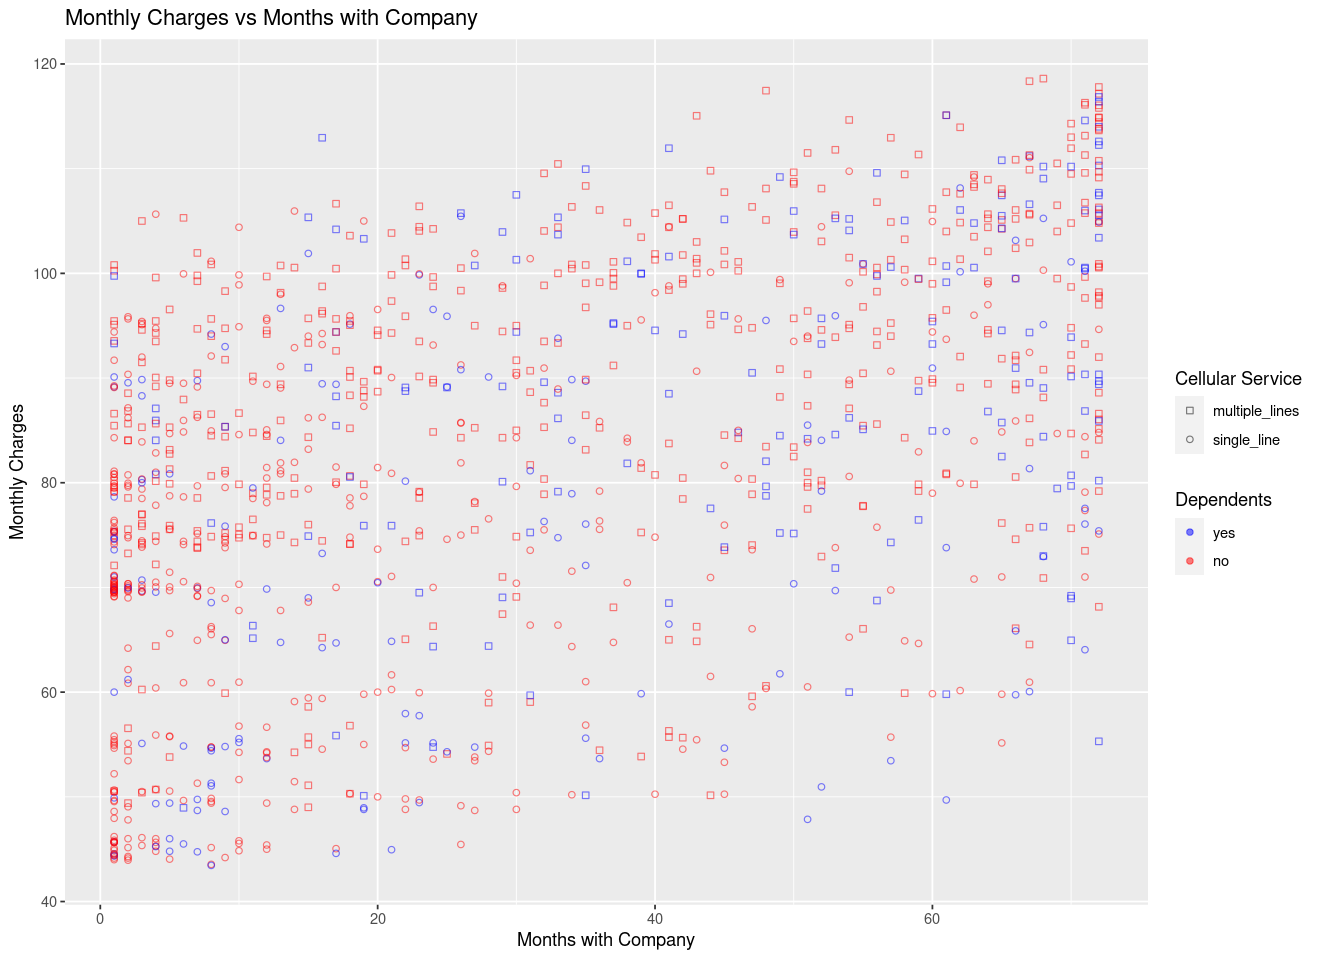

In [190]:
## **Supporting Analysis**
ggplot(telecom_df, aes(x=months_with_company, y=monthly_charges, color=dependents, shape=cellular_service)) +
  geom_point(alpha=0.5) +
  ggtitle("Monthly Charges vs Months with Company") +
  xlab("Months with Company") + ylab("Monthly Charges") +
  scale_color_manual(values=c("blue", "red"), name="Dependents") +
  scale_shape_manual(values=c(0, 1), name="Cellular Service")



telecom_df %>%
  group_by(dependents, cellular_service, canceled_service) %>%
  summarise(n = n(),
            avg_months_with_company = mean(months_with_company),
            avg_monthly_payments = mean(monthly_charges)) 




## Question 6


**Question**: Does the number of months a person has worked for the organization, additional services, and service status correlate? 


**Answer**:


The provided code appears to be performing some exploratory data analysis on a telecom dataset to investigate whether there is a correlation between the number of months a person has worked for the organization, additional services, and service status. Based on the summary statistics provided in the code, it is difficult to determine if there is a correlation between the number of months a person has worked for the organization, additional services, and service status. It appears that customers who have canceled their service have been with the company for longer periods on average than those who have not canceled. Additionally, customers who have subscribed to online_security or streaming_tv/streaming_movies have been with the company for longer periods on average than the overall average. However, without further statistical analysis (e.g., correlation analysis, regression analysis), it is difficult to draw any definitive conclusions.


## Supporting Analysis


canceled_service,customer_Count,avg_months_withCompany,avg_montly_payments
<fct>,<int>,<dbl>,<dbl>
No,389,18.46272,82.11157
Yes,706,40.21813,82.92939


canceled_service,customer_Count,avg_months_withCompany,avg_montly_payments
<fct>,<int>,<dbl>,<dbl>
No,64,27.54688,85.63672
Yes,336,47.79762,84.80952


canceled_service,customer_Count,avg_months_withCompany,avg_montly_payments
<fct>,<int>,<dbl>,<dbl>
No,349,17.47278,81.28510
Yes,512,38.76172,82.20937


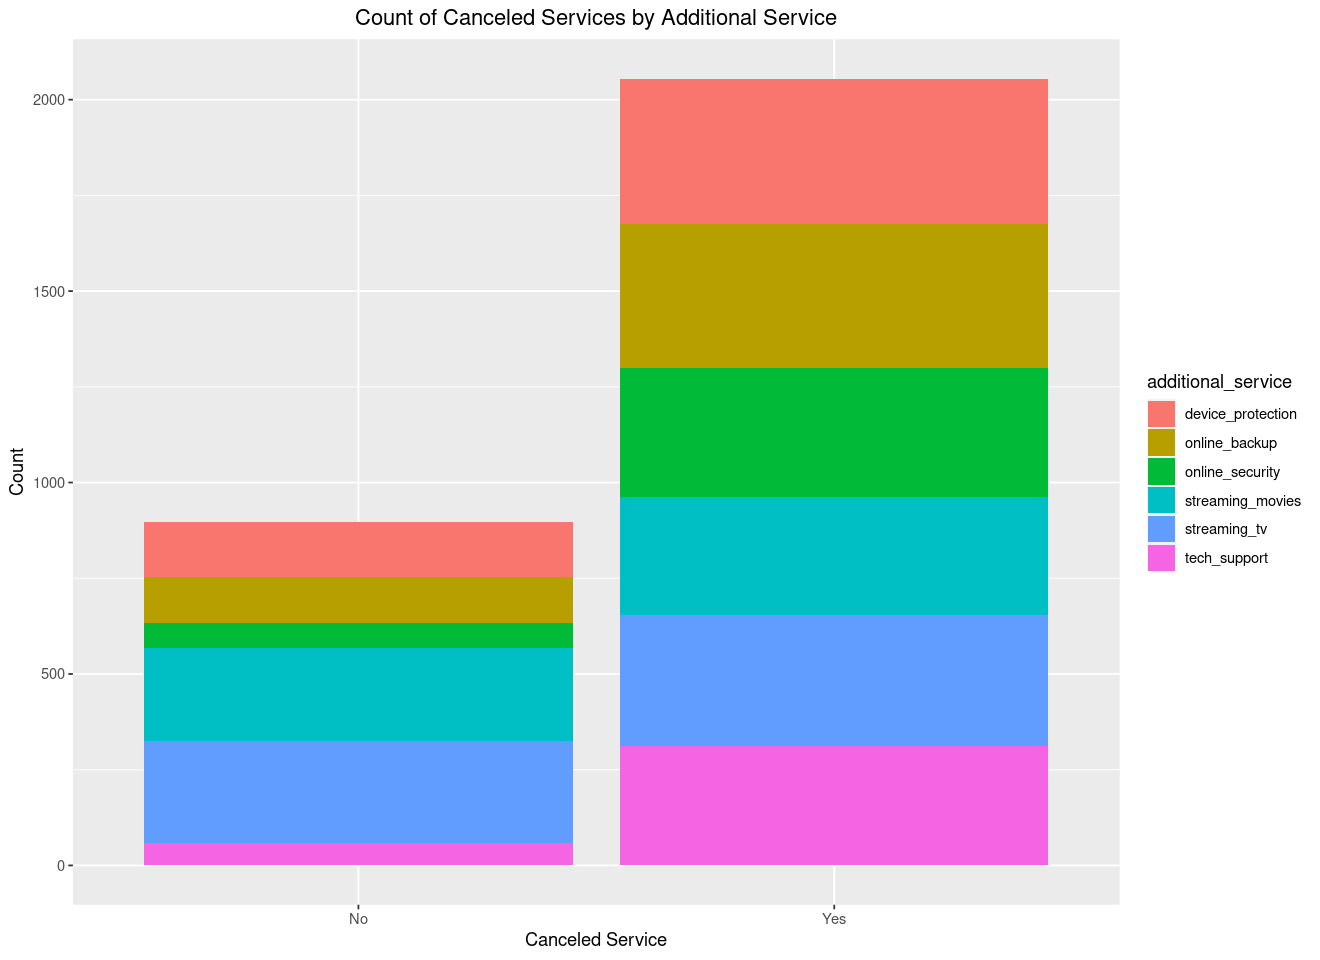

In [191]:
telecom_df%>% filter(online_security == "yes"| online_backup =="yes"| device_protection == "yes"|tech_support=="yes"|streaming_tv =="yes"|streaming_movies =="yes")%>%group_by(canceled_service)%>%    
                            summarise(customer_Count= n(),
                            avg_months_withCompany = mean(months_with_company),
                            avg_montly_payments = mean(monthly_charges)) 
telecom_df%>% filter(online_security =="yes")%>%group_by(canceled_service)%>%    
                            summarise(customer_Count= n(),
                            avg_months_withCompany = mean(months_with_company),
                            avg_montly_payments = mean(monthly_charges))
telecom_df%>% filter(streaming_tv =="yes"|streaming_movies =="yes")%>%group_by(canceled_service)%>%    
                            summarise(customer_Count= n(),
                            avg_months_withCompany = mean(months_with_company),
                            avg_montly_payments = mean(monthly_charges)) 
#stacked bar plot
telecom_df %>% 
  filter(online_security == "yes" | online_backup == "yes" | device_protection == "yes" | tech_support == "yes" | streaming_tv == "yes" | streaming_movies == "yes") %>% 
  group_by(canceled_service) %>%    
  summarise(
    online_security = sum(online_security == "yes"),
    online_backup = sum(online_backup == "yes"),
    device_protection = sum(device_protection == "yes"),
    tech_support = sum(tech_support == "yes"),
    streaming_tv = sum(streaming_tv == "yes"),
    streaming_movies = sum(streaming_movies == "yes")
  ) %>% 
  pivot_longer(cols = -canceled_service, names_to = "additional_service", values_to = "count") %>% 
  ggplot(aes(x = canceled_service, y = count, fill = additional_service)) +
  geom_col(position = "stack") +
  xlab("Canceled Service") +
  ylab("Count") +
  ggtitle("Count of Canceled Services by Additional Service") +
  theme(plot.title = element_text(hjust = 0.5))





# Machine Learning Modeling (75 Points)
In this section of the project, you will fit **three classification algorithms** to predict the response variable,`canceled_service`. You should use all of the other variables in the `telecom_df` data as predictor variables for each model.

You must follow the machine learning steps below. 

The data splitting and feature engineering steps should only be done once so that your models are using the same data and feature engineering steps for training.

1. Split the `telecom_df` data into a training and test set (remember to set your seed)
2. Specify a feature engineering pipeline with the `recipes` package
    - You can include steps such as skewness transformation, dummy variable encoding or any other steps you find appropriate
3. Specify a `parsnip` model object
    - You may choose from the following classification algorithms:
      - Logistic Regression
      - LDA
      - QDA
      - KNN
      - Decision Tree
      - Random Forest
4. Package your recipe and model into a workflow
5. Fit your workflow to the training data
    - If your model has hyperparameters:
      - Split the training data into 5 folds for 5-fold cross validation using `vfold_cv` (remember to set your seed)
      - Perform hyperparamter tuning with a random grid search using the `grid_random()` function
      - Refer to the following tutorial for an example - [Random Grid Search](https://gmubusinessanalytics.netlify.app/lesson-08-r-tutorial.html#Hyperparameter_Tuning14)
      - Hyperparameter tuning can take a significant amount of computing time. Be careful not to set the `size` argument of `grid_random()` too large. I recommend `size` = 10 or smaller.
      - Select the best model with `select_best()` and finalize your workflow
6. Evaluate model performance on the test set by plotting an ROC curve using `autoplot()` and calculating the area under the ROC curve on your test data

In [192]:
# Run this R code to install ML packages that you might need (Will take about 2 minutes)
install.packages(
    c('vip', 'rpart.plot', 'discrim', 'klaR', 'ranger'), 
    repos = 'https://mran.microsoft.com/snapshot/2023-01-01/')

Installing packages into ‘/home/repl/renv/library/R-4.2/x86_64-pc-linux-gnu’
(as ‘lib’ is unspecified)



## Data Resampling
First split your data into training and test sets. If performing hyperparameter tuning, also create folds from your training data

In [193]:
set.seed(123)

# Split data into training and test sets
telecomdata_split <- initial_split(telecom_df, prop = 0.75, strata = canceled_service)
telecomdata_train <- telecomdata_split %>% training()
telecomdata_test <- telecomdata_split %>% testing()


#Check for the number of rows in the datasets respectively
nrow(telecomdata_train)
nrow(telecomdata_test)

# Creation of folds for cross-validation
telecomdata_folds <- vfold_cv(telecomdata_train, v = 10, strata = canceled_service)



[1] 881

[1] 294

## Feature Engineering Pipeline
Specify your feature engineering pipeline with the `recipes` package. You will use the pipeline when you create your modeling workflows below for each of your models.

In [194]:
#Feature engineering

telecomdata_recipe <- recipe(canceled_service ~ ., data = telecomdata_train) %>% 
                 step_YeoJohnson(all_numeric(), -all_outcomes()) %>% 
                 step_normalize(all_numeric(), -all_outcomes()) %>% 
                 step_dummy(all_nominal(), -all_outcomes())
telecomdata_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:    1
predictor: 18



── Operations 

• Yeo-Johnson transformation on: all_numeric(), -all_outcomes()

• Centering and scaling for: all_numeric(), -all_outcomes()

• Dummy variables from: all_nominal(), -all_outcomes()



## Model 1 Training

In [195]:
#Logistic Regression

# Training and transforming of credit_card_recipe

telecomdata_recipe %>% 
  prep(training = telecomdata_train) %>% 
  bake(new_data = NULL)


avg_call_mins,avg_intl_mins,months_with_company,monthly_charges,canceled_service,senior_citizen_no,spouse_partner_no,dependents_no,cellular_service_single_line,internet_service_digital,⋯,device_protection_no,tech_support_no,streaming_tv_no,streaming_movies_no,contract_one_year,contract_two_year,paperless_bill_no,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.09532827,-0.92735818,-1.6420935,0.32350167,No,1,0,0,1,0,⋯,1,1,1,1,0,0,1,0,0,1
-1.47880804,0.33967500,-1.3318263,-0.26939752,No,1,1,1,1,0,⋯,1,1,0,0,0,0,0,0,1,0
0.88415790,0.27608438,-1.2131542,0.20638221,No,1,1,0,0,0,⋯,0,0,0,1,0,0,0,0,0,1
-0.63524871,-0.72825836,-0.7027137,1.23755303,No,1,1,1,1,0,⋯,0,1,0,0,0,0,0,0,1,0
0.84189259,-0.01174092,-0.7728875,0.47404693,No,1,0,1,0,0,⋯,0,1,0,1,0,0,1,0,0,0
-0.98174845,-0.79443098,0.6675374,1.05191825,No,1,1,1,0,0,⋯,1,1,1,1,0,0,0,0,1,0
1.13941738,0.59277017,0.5788378,1.07958536,No,0,0,1,0,0,⋯,1,1,1,0,0,0,1,0,1,0
1.49856520,-0.27003130,-1.4706298,-0.72416868,No,1,1,1,1,0,⋯,1,1,0,0,0,0,0,1,0,0
-0.36007416,-2.02513588,-0.7027137,0.95710494,No,1,0,1,1,0,⋯,1,0,0,1,0,0,0,0,1,0


## Model 1 Performance Evaluation

In [ ]:
# Logistic Regression Model
telecomdata_logistic_model <- logistic_reg() %>% 
                  set_engine('glm') %>% 
                  set_mode('classification')

# Creation of Workflow
telecomdata_logistic_wf <- workflow() %>% 
               add_model(telecomdata_logistic_model) %>% 
               add_recipe(telecomdata_recipe)

# Fitting Model
telecomdata_logistic_fit <- telecomdata_logistic_wf  %>% fit(data=telecomdata_train)

# Collection of Predictions

#Obtaining class predictions
class_predictions<-predict(telecomdata_logistic_fit,new_data = telecomdata_test,type = "class")

#Obtaining estimated probabilities
probabilty_predictions<-predict(telecomdata_logistic_fit,new_data = telecomdata_test,type = "prob")

#Combining the test set results
telecomdata_results <- telecomdata_test %>% 
  dplyr::select(canceled_service) %>% 
  bind_cols(class_predictions, probabilty_predictions)

telecomdata_results

#Creating custom metrics function
telecomdata_metrics <- metric_set(accuracy, sens, spec, f_meas, roc_auc)

telecomdata_metrics(telecomdata_results, 
           truth = canceled_service, 
           estimate = .pred_class,
           .pred_yes)


#training with last fit
# Fit Model
telecomdata_logistic_fit1 <- telecomdata_logistic_wf %>% 
                last_fit(split = telecomdata_split)
telecomdata_logistic_results <-  telecomdata_logistic_fit1 %>% 
                     collect_predictions()

# Plot ROC Curve
roc_curve(telecomdata_logistic_results, 
          truth = canceled_service, 
          estimate = .pred_yes) %>% 
  autoplot()

roc_auc(telecomdata_logistic_results, 
        truth = canceled_service,
        .pred_yes)

canceled_service,.pred_class,.pred_No,.pred_Yes
<fct>,<fct>,<dbl>,<dbl>
Yes,Yes,0.045120041,0.95487996
Yes,Yes,0.062284982,0.93771502
No,No,0.768076012,0.23192399
Yes,Yes,0.158512980,0.84148702
No,No,0.973494080,0.02650592
Yes,Yes,0.007481393,0.99251861
Yes,Yes,0.021995893,0.97800411
No,No,0.625324823,0.37467518
No,No,0.814598836,0.18540116


ERROR: [1m[33mError[39m in `metric_set()`:[22m
[33m![39m Failed to compute `roc_auc()`.
[1mCaused by error in `dots_to_estimate()`:[22m
[33m![39m Can't subset columns that don't exist.
[31m✖[39m Column `.pred_yes` doesn't exist.


## Model 2 Training

In [149]:
#Random forest model

# Creating a Random Forest model
telecomdata_rf_model <- rand_forest() %>% 
  set_engine("randomForest") %>% 
  set_mode("classification")

# Creating a workflow
telecomdata_rf_wf <- workflow() %>% 
  add_model(telecomdata_rf_model) %>% 
  add_recipe(telecomdata_recipe)






## Model 2 Performance Evaluation

In [180]:
# Fitting the model
telecomdata_rf_fit <- telecomdata_rf_wf %>% fit(data = telecomdata_train)

# Collecting predictions
rf_class_predictions <- predict(telecomdata_rf_fit, new_data = telecomdata_test, type = "class")
rf_probability_predictions <- predict(telecomdata_rf_fit, new_data = telecomdata_test, type = "prob")

# Combining the test set results
rf_telecomdata_results <- telecomdata_test %>% 
  dplyr::select(canceled_service) %>% 
  bind_cols(rf_class_predictions, rf_probability_predictions)

rf_telecomdata_results


## Model 3 Training

In [176]:
# Model 2
#K-Nearest Neighbours(KNN)

#set seed
set.seed(245)
#Dividing dataset into k-groups or folds each equal size


telecomdata_folds <- vfold_cv(telecomdata_train, v = 4)

#Create a KNN model
telecomdata_knn_model <- nearest_neighbor(neighbors = tune()) %>% 
            #set engine to knn
             set_engine('kknn') %>% 
            #set mode as classification
             set_mode('classification')

#create a workflow
telecomdata_knn_wf<-workflow() %>% 
          #Include model object
          add_model(telecomdata_knn_model) %>% 
          #Include recipe object
          add_recipe(telecomdata_recipe)

## Create a grid of hyperparameter values to test
knn_grid <- tibble(neighbors = c(10, 20, 30, 50, 75, 100, 125, 150))

#View Grid
knn_grid



## Model 3 Performance Evaluation

In [181]:
## Tune  workflow
set.seed(360)

knn_tuning <- telecomdata_knn_wf %>% 
              tune_grid(resamples = telecomdata_folds,  grid = knn_grid)

## Show the top 5 best models based on roc_auc metric
knn_tuning %>% show_best('roc_auc')

## Select best model based on roc_auc
best_knn <- knn_tuning %>% 
          select_best(metric = 'roc_auc')

## View model
best_knn

## Finalize workflow by adding the best performing model
final_knn_wf <- telecomdata_knn_wf %>% 
                finalize_workflow(best_knn)

#Train and evaluate with last_fit()
telecomdata_last_fit_knn <- final_knn_wf %>% 
                last_fit(split = telecomdata_split)

telecomdata_last_fit_knn %>% collect_metrics()

#Collect Predictions
telecomdata_knn_predictions <- telecomdata_last_fit_knn %>% 
                   collect_predictions()

telecomdata_knn_predictions

#Create a confusion matrix
conf_mat(telecomdata_knn_predictions, truth = canceled_service, estimate = .pred_class)

#Plot ROC Curve
telecomdata_knn_predictions %>% 
  roc_curve(truth = canceled_service, estimate = .pred_yes) %>% 
  autoplot()



f_meas(telecomdata_knn_predictions, truth = canceled_service, estimate = .pred_class)




# Executive Summary (25 Points)

Write an executive summary of your overall findings and recommendations to the executives at this company. Think of this section as your closing remarks of a presentation, where you summarize your key findings and make recommendations to improve pricing, company operations, and car insurance policy adjustments.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
- This section is meant to **establish the need for your recommendations** 
        in the following section

3. Your “best” classification model and an analysis of its performance 
	- In this section you should talk about the expected error of your model on future data
	 	- To estimate future performance, you can use your model performance results on the **test data**
    - You should discuss at least one performance metric, such as an F1, sensitivity, specificity, or ROC AUC for your model. However, you must explain the results in an **intuitive, non-technical manner**. Your audience in this case are executives at a telecommunications company with limited knowledge of machine learning.

4.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add your executive summary in the text block below**

## Introduction

The telecom_df data frame contains information on over 1,000 customers of a U.S. telecommunications company which provides Internet and cellular service.The goal of this research is to investigate the causes of customers canceling their mobile and Internet service and to create machine learning algorithms that can forecast future cancellation probabilities. In order to reduce financial losses, the business needs to understand the reasons why customers cancel their services and whether it can anticipate whether a client will do so in the future. The outcome variable, canceled service, in the data set indicates if a customer ultimately cancelled their service and whether there was a financial loss to the company. The data set includes a blend of client information and behavior and indicates a financial loss to the company. Customers in the sample, 637 out of 1000, have a single-line service, and the majority of them do not have dependents (400 out of 1000). Regardless of whether they have dependents, customers who have numerous lines typically pay a greater average monthly cost than those who just have a single line. Customers with several lines and no dependents, for instance, pay an average monthly payment of 89.78 while those with only one line and no dependents pay an average monthly payment of 72.54.

The questions which I was trying to answer includes : Is there any Correlation between various charecteristics? Is there any relationship between the cancellation rate of telecom services for customers with dependents, as well as for senior citizens.Does internet service type affect the likelihood of canceling service?  These questions matter for the analysis because they help to identify potential factors that may be associated with customer cancellation of telecom services. By exploring the correlation and relationship between different characteristics and the cancellation rate, the company can gain insights into the key drivers of customer churn and develop targeted strategies to reduce the risk of service cancellation. By exploring the correlation and relationship between different characteristics and the cancellation rate, the company can gain insights into the key drivers of customer churn and develop targeted strategies to reduce the risk of service cancellation which can be used to inform the development of predictive models and customer retention strategies.

## Key Findings

The provided dataset contains valuable insights into the characteristics of customers of a U.S. telecommunications company. Several observations can be made based on the data analysis. 
Firstly, the majority of customers in the dataset do not have dependents and use a single-line service. Secondly, customers with multiple lines tend to have a higher average monthly payment than those with a single line, regardless of whether or not they have dependents. Thirdly, customers who have been with the company for a longer duration tend to have a higher average monthly payment than those who have been with the company for a shorter duration. The customers with dependents have a higher average monthly payment than those without dependents, regardless of whether they have a single line or multiple lines. 

Finally, the analysis reveals that customers who have canceled their service tend to have a lower average monthly payment than those who have not canceled their service. These observations provide insights into the factors that may contribute to customers' decisions to cancel their service and can be used to develop strategies to reduce customer churn and increase customer satisfaction.


## Modeling Results

I have used Logistic Regression, Random Forest and KNN models to predict which customers could potentially cancel their service and determine the most important variables that have the biggest effects on service cancellation.To judge the model's accuracy I used the ROC AUC. The greater the ROC AUC, the more precise the model's forecast was.

-----------------------------------------------------------------------------
Model    |  Logistic Regression |   RandomForest |      KNN      |
-----------------------------------------------------------------------------
Accuracy |     0.7925          |   0.7380952    |   0.7823     |
-----------------------------------------------------------------------------
roc_auc  |     0.8801          |   0.8234794 	|   0.8446      |
-----------------------------------------------------------------------------
F1 score |     0.7081          |   0.658508  	|   0.7444      |
-----------------------------------------------------------------------------

The ROC AUC for the Logistic Regression model is 88.1%. The ROC AUC for the KNN model is 82.61%. The ROC AUC for the KNN Model is 78.23%. The Logistic Regression model is the best when comparing the performance of the aforementioned models because it has the highest accuracy, the area under the ROC curve, and the F1 score.

The most fundamental and obvious performance metric is accuracy, which is essentially the ratio of properly predicted observations to all observations. This means that, when it comes to other variables, such as those that affect customer status, the study we conducted by predicting the characteristics that consumers use to decide whether or not to cancel their subscription is accurate 80% of the time. It is clear how important it is for the business to keep an eye on, evaluate, and improve these factors.

The logistic model summary shows that some characteristics, such as average phone minutes, average international minutes, no streaming movies, and months with company, have a greater impact on customer service cancellation than the other predictors.

## Recommendations

Focusing on improving customer retention strategies: The analysis shows that customers who have canceled their service tend to have a lower average monthly payment than those who have not canceled their service. Therefore, the company should focus on improving its customer retention strategies by offering incentives or rewards to loyal customers or addressing customer complaints and issues proactively. Monitoring and enhanceing the key factors affecting customer churn: According to the logistic regression model, average call minutes, average international minutes, streaming movies, and months with the company are the key predictors of service cancellation. The company should monitor these factors closely and take steps to enhance customer satisfaction in these areas. Targeted strategies for customers with dependents: The analysis did not find a significant relationship between cancellation rate and dependents or senior citizens. 

However, customers with dependents have a higher average monthly payment than those without dependents. Therefore, the company should consider developing targeted strategies for this segment of customers to retain their business. Exploring the impact of internet service type on service cancellation: The analysis did not find a significant relationship between internet service type and service cancellation. However, the company should further investigate this area to understand if there are any specific issues or factors that affect customers who use different types of internet service. Continuing to improve predictive modeling capabilities: The logistic regression model performed better than the random forest and KNN models in predicting service cancellation. Therefore, the company should continue to invest in improving its predictive modeling capabilities to better understand and anticipate customer behavior.





